## Objective
Identify the most relevant demographic attributes and develop a model to predict the items for
a user. Check if the new model improved the prediction or not.
Dataset
Data: https://grouplens.org/datasets/movielens/100k/
Possible Work to be done
1. Write a Data Science Proposal for achieving the objective mentioned.
2. Perform exploratory analysis on the data.
3. Perform data wrangling / pre-processing.
4. Apply any 2 features engineering technique.
5. Plot top 10 features.
6. Identification of the performance parameters to be improved, for the given problem
statement.
7. Design Machine Learning models – Logistic regression and Decision tree to predict.
8. Compare the performance of selected feature engineering techniques.
9. Compare the performance of the 2 classifiers – Logistic regression and Decision tree to
predict.
10. Present the conclusions/results in the format shared.

### 1. Data Science Proposal for achieving the objective mentioned.

Given a set of users with their previous ratings for a set of movies(items). To implement movie recommendation system by predicting the likelihood of movies. A user will like or prefer to watch based on a movie the user has lately watched. 
- The recommendation system aims to recommend the top rated movies to the users based on the previous ratings for a set of movies that other users have previously rated.
- We are using similarity, Distance measure and correlation technique to understand given dataset deeply.
- Finding hidden feature and parameter tuning for better model accuracy.

In [1]:
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import datasets, linear_model,tree,metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
cwd = os.getcwd()
path = os.path.join(cwd, "ml-100k")

### The full u data set, 100000 ratings by 943 users on 1682 items(Movies).
Each user has rated at least 20 movies.  Users and items are numbered consecutively from 1. 

#### Features : user id | item id | rating | timestamp. 

Understanding:
- User rating are distinct against movie
- The data is randomly ordered.
- timespan is a Datetime field, indicates the time user rated the movie.
- The time stamps are unix seconds since 1/1/1970 UTC  

In [2]:
features_data=['user id','movie id','rating','timestamp']
dsudata=pd.read_csv(os.path.join(path,"u.data"),sep="\t",header=None,names=features_data)
dsudata.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### The number of users, items, and ratings in the u data set.
Understanding:
- u.info gives a better overview about unique count on users | items | ratings

In [3]:
feature_info=['Count','Type']
dsuinfo=pd.read_csv(os.path.join(path,"u.info"),sep=" ",header=None,names=feature_info)
dsuinfo.head()

,Count,Type
0,943,users
1,1682,items
2,100000,ratings


### Information about the items (movies)
#### Features : movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western | 

In [4]:
features_item=['movie id','movie title','release date','video release date','IMDb URL','unknown','Action','Adventure','Animation','Children''s','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
dsuitem=pd.read_csv(os.path.join(path,"u.item"), sep='|', header=None,names=features_item ,encoding = "ISO-8859-1")# encoding='latin-1')
dsuitem.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Understanding:
- 1 indicates the movie is of that genre
- 0 indicates it is not; 
- Movies can be in several genres at once. 
- The movie ids are the ones used in the u.data data set.
- The last 19 fields are the genres

### A list of the genres. There are 19 Genres available in given dataset

In [5]:
feature_genre=['Type','ID']
dsugenre=pd.read_csv(os.path.join(path,"u.genre"),sep="|",header=None,names=feature_genre)
dsugenre

,Type,ID
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


### Demographic information about the users
Features: user id | age | gender | occupation | zip code
- The user ids are the ones used in the u.data data set.

In [6]:
features_user=['user id','age','gender','occupation','zip code']
dsuuser=pd.read_csv(os.path.join(path,"u.user"),sep='|',header=None,names=features_user)
dsuuser.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### List of unique occupation
There are 21 unique user occupation are there in given dataset

In [7]:
feature_occuptaion=['Occupation']
dsuoccu=pd.read_csv(os.path.join(path,"u.occupation"),header=None,names=feature_occuptaion)
dsuoccu

,Occupation
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


### 2. Perform exploratory analysis on the data.
### Numerical Analysis:
- Central tendency with help of Mean
- Skewness and kurtosis distribution
- Median with concern about outliers, the  may be preferred.
- Distribution

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


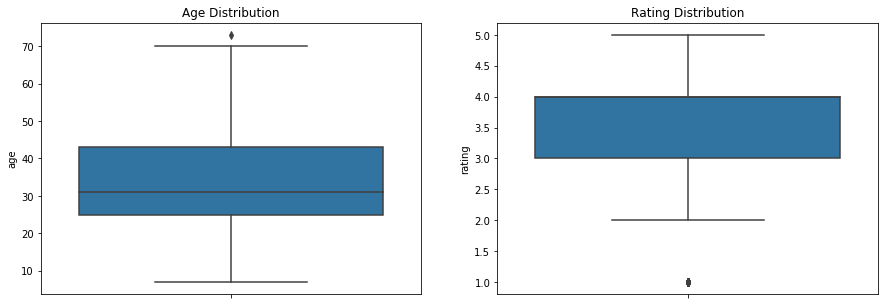

In [8]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y="age",data=dsuuser,ax=axes[0]).set_title("Age Distribution")
sns.boxplot(y="rating",data=dsudata,ax=axes[1]).set_title("Rating Distribution")
plt.subplots_adjust(hspace=1)
dsudata.describe()

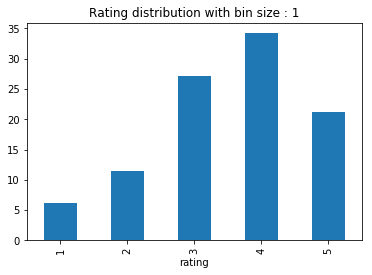

In [9]:
ratings = dsudata[['user id', 'movie id','rating']]
ratings_df = ratings.groupby(['user id','movie id']).aggregate(np.max)
cnt_ratings = ratings.groupby('rating').count()
cnt_ratings['perc_total']=round(cnt_ratings['user id']*100/cnt_ratings['user id'].sum(),1)
cnt_ratings['perc_total'].plot.bar(title='Rating distribution with bin size : 1')

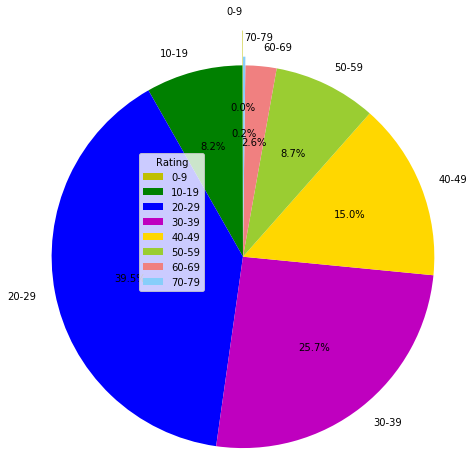

In [10]:
# Ratings given by Users based on Age group
df_Sample = pd.merge(dsudata,dsuuser)
labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
df_Sample['age_group'] = pd.cut(df_Sample.age, range(0, 81, 10), right=False, labels=labels)
distage=df_Sample.groupby('age_group').agg({'rating':[np.size,np.mean]})
colors=["y","g","b","m",'gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie(distage['rating']['size'],startangle=90,labels=labels,colors=colors,explode=(0.4,0,0,0,0,0,0,0.1),autopct = '%1.1f%%',radius=2.2)
plt.legend(title='Rating')
plt.show()

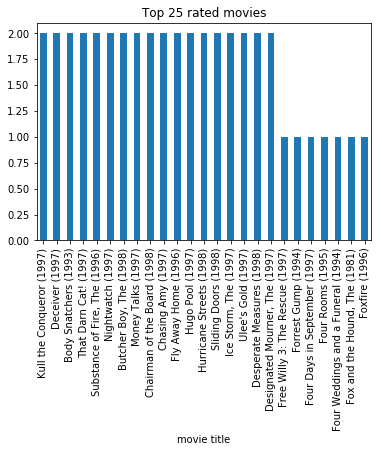

In [11]:
most_rated=dsuitem.groupby('movie title').size().sort_values(ascending=False)[:25]
most_rated.plot(kind="bar",title="Top 25 rated movies",label="count")

Text(0.5, 1.0, 'Age grouping vs Rating')

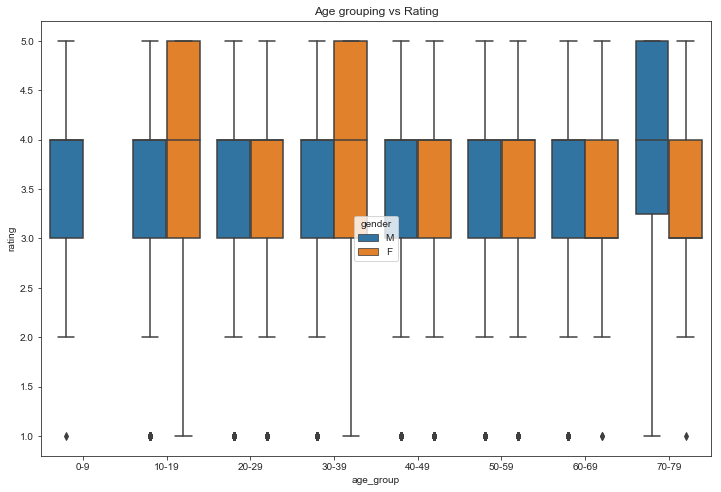

In [12]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.boxplot(x='age_group', y='rating', data=df_Sample, hue='gender')
plt.title('Age grouping vs Rating')

### Categorical Data Exploration

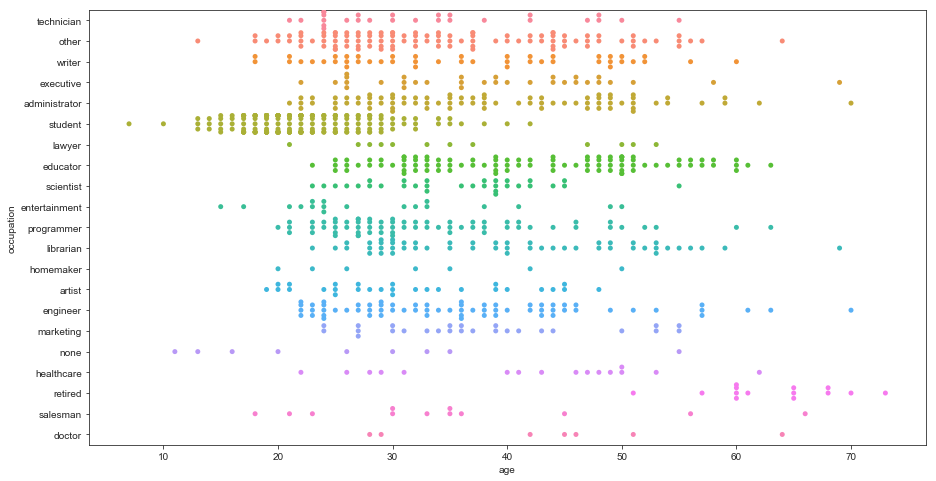

In [13]:
fig = plt.figure(figsize=(15,8))
fig.add_subplot(1,1,1)
sns.swarmplot(x="age", y="occupation", data=dsuuser)

### User data exploration

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


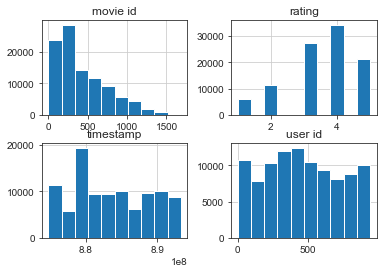

In [14]:
dsudata.hist()
dsuuser.describe()

### 3. Perform data wrangling / pre-processing.
Data wrangling :
- Cleaning
- Restructuring
- Enriching raw data

In [15]:
def apply_data_wrangling():
    global dszudatausermoviefiltered
    dszudatauser=dsudata
    dszudatauser=dszudatauser.join(dsuuser.set_index('user id'),on='user id')
    dszudatausermovie=dszudatauser.join(dsuitem.set_index('movie id'),on='movie id')    
    feature_remove=['video release date','zip code'] # 'timestamp'
    dszudatausermoviefiltered=dszudatausermovie.drop(feature_remove,axis=1)
    unq_data=dszudatausermoviefiltered.nunique()
    dszudatausermoviefiltered.groupby('rating')['movie title'].count().sort_values(ascending=False)
    dszudatausermoviefiltered.groupby('movie title')['rating'].count().sort_values(ascending=False)
    nullclass=dszudatausermoviefiltered[dszudatausermoviefiltered.isnull().any(axis=1)]
    # IMDB Categorical data adding no value for prediction
    dszudatausermoviefiltered=dszudatausermoviefiltered.drop(['IMDb URL'],axis=1)
    nullclass=dszudatausermoviefiltered[dszudatausermoviefiltered.isnull().any(axis=1)]
    # Release date feature is null which is considered to be invalid class
    global rating
    rating=pd.DataFrame(dszudatausermoviefiltered.groupby('movie title')['rating'].mean())
    rating['rating_count']=pd.DataFrame(dszudatausermoviefiltered.groupby('movie title')['rating'].count())
apply_data_wrangling()
dszudatausermoviefiltered.head()

,user id,movie id,rating,timestamp,age,gender,occupation,movie title,release date,unknown,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,Kolya (1996),24-Jan-1997,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,39,F,executive,L.A. Confidential (1997),01-Jan-1997,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,25,M,writer,Heavyweights (1994),01-Jan-1994,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,28,M,technician,Legends of the Fall (1994),01-Jan-1994,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,47,M,educator,Jackie Brown (1997),01-Jan-1997,0,...,0,0,0,0,0,0,0,0,0,0


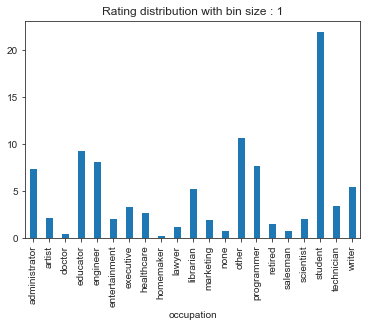

In [16]:
occ_ = dszudatausermoviefiltered[['user id', 'movie id','rating','occupation']]
occ_df = occ_.groupby(['occupation']).aggregate(np.max)
cnt_occ = occ_.groupby('occupation').count()
cnt_occ['perc_total']=round(cnt_occ['user id']*100/cnt_occ['user id'].sum(),1)
cnt_occ['perc_total'].plot.bar(title='Rating distribution with bin size : 1')

### 4. Apply any 2 features engineering technique.
By considering the importtance of gender and occupation categorical feature, 

Below techniques are used for Occupation and Gender feature. 
- OneHotEncoding  
- LabelEncoding 

In [17]:
dsmid=dszudatausermoviefiltered.copy()
dsmeanrating=rating.copy()

In [18]:
dsmid=dsmid.drop(['release date'],axis=1)
dsmid=dsmid.drop(['timestamp'],axis=1)
dsmid=dsmid.drop(['user id'],axis=1)
dsmid=dsmid.drop(['movie id'],axis=1)

In [19]:
dsmid['occupation'] = dsmid['occupation'].astype('category')
dsmid['gender'] = dsmid['gender'].astype('category')
one_hot_occ = dsmid.occupation.str.get_dummies()
dsmid = dsmid.drop('occupation',axis=1)
dsmid = dsmid.join(one_hot_occ,how='inner')
one_hot_g = dsmid.gender.str.get_dummies()
dsmid = dsmid.drop('gender',axis=1)
dsmid = dsmid.join(one_hot_g,how='inner')
dsmid=dsmid[['movie title', 'age', 'unknown', 'Action', 'Adventure', 'Animation','Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi','Thriller', 'War', 'Western', 'administrator','artist', 'doctor', 'educator', 'engineer', 'entertainment','executive', 'healthcare', 'homemaker', 'lawyer', 'librarian','marketing', 'none', 'other', 'programmer', 'retired', 'salesman','scientist', 'student', 'technician', 'writer','M','F', 'rating']]

### 5. Plot top 10 features.

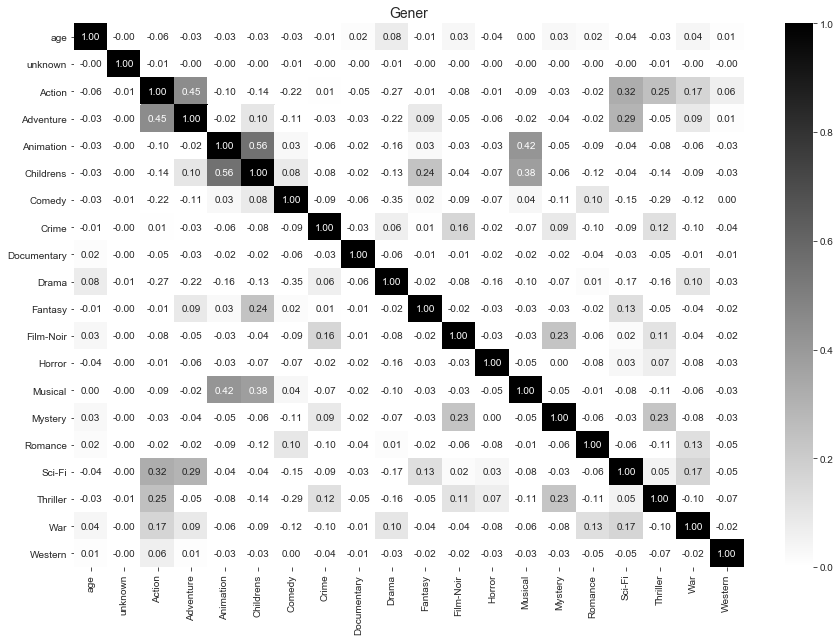

In [20]:
def get_correlation(dt_set,c_start,c_end,title):
    plt.figure(figsize=(15,10))
    plt.title(title, fontsize=14)
    corr_fea = dt_set.iloc[:,c_start:c_end].corr()
    sns.heatmap(corr_fea, vmin=0, vmax=1., square=False,annot=True, fmt='.2f', cmap="gray_r")
get_correlation(dsmid,1,21,'Gener')

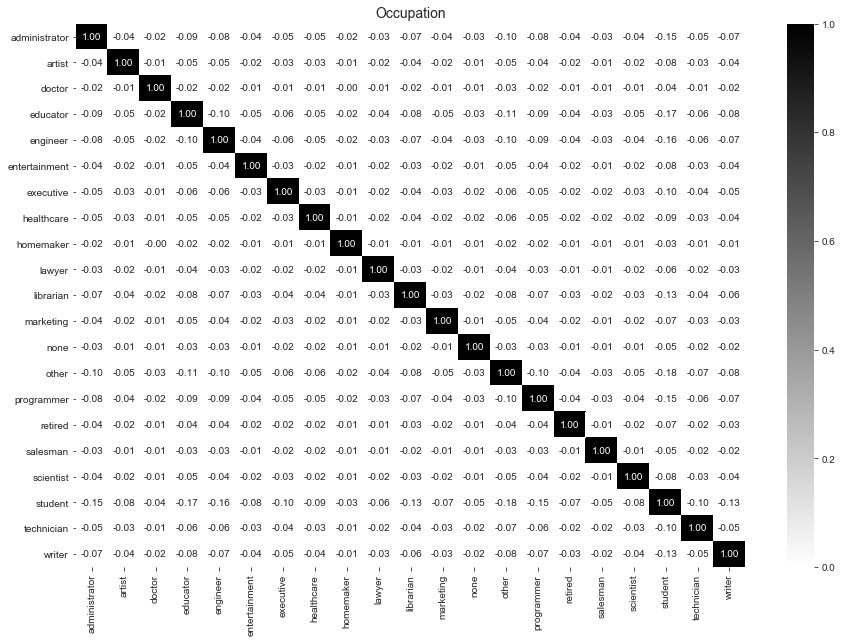

In [21]:
get_correlation(dsmid,21,42,'Occupation')

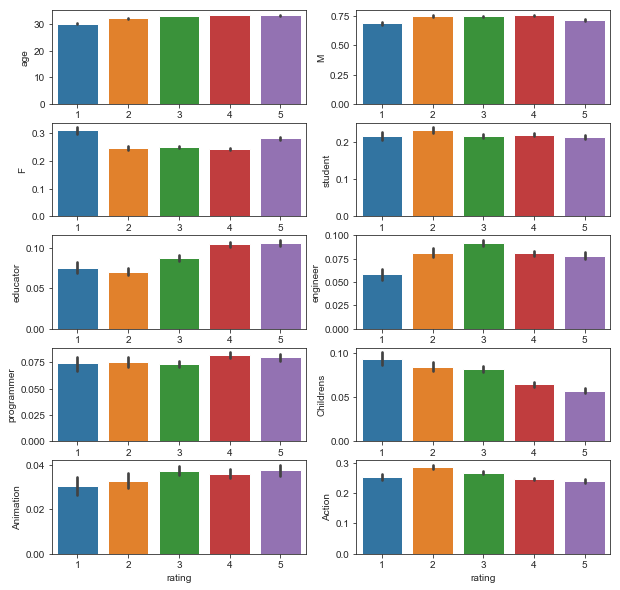

In [22]:
_, ax = plt.subplots(5, 2, figsize=(10,10))
plt_feature = ['age' ,'M', 'F','student','educator', 'engineer','programmer','Childrens','Animation', 'Action']
for idx,i in enumerate(plt_feature, start=0):  
    sns.barplot(x='rating', y=i, data=dsmid,ax=ax[idx//2][idx%2])
plt.show()

### 6. Identification of the performance parameters to be improved, for the given problem statement.

In [23]:
correlation_matrix = dsmid.corr()
correlation_matrix.head(5)

,age,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,programmer,retired,salesman,scientist,student,technician,writer,M,F,rating
age,1.000000,-0.004817,-0.063920,-0.034052,-0.034667,-0.028196,-0.027367,-0.008749,0.015195,0.077877,...,-0.011818,0.318365,0.004026,0.029752,-0.496675,-0.020728,0.028391,0.033358,-0.033358,0.054460
unknown,-0.004817,1.000000,-0.005864,-0.003993,-0.001934,-0.002782,-0.006521,-0.002960,-0.000874,-0.008148,...,0.000820,-0.001279,-0.000929,-0.001450,-0.002889,0.003531,0.001952,0.001313,-0.001313,-0.002930
Action,-0.063920,-0.005864,1.000000,0.451525,-0.099022,-0.144838,-0.223283,0.007478,-0.051250,-0.269833,...,0.027840,-0.024357,0.000736,0.006356,0.043149,0.022657,-0.012487,0.059997,-0.059997,-0.025847
Adventure,-0.034052,-0.003993,0.451525,1.000000,-0.024734,0.100567,-0.113014,-0.030066,-0.034899,-0.223704,...,0.018094,-0.014143,-0.005902,0.000402,0.023726,0.011969,-0.011093,0.026500,-0.026500,-0.009342
Animation,-0.034667,-0.001934,-0.099022,-0.024734,1.000000,0.555386,0.029612,-0.057239,-0.016901,-0.157554,...,0.006156,-0.009808,-0.009235,-0.004984,0.015868,0.001636,-0.005530,-0.008230,0.008230,0.008047


In [24]:
def get_dataset():
    dsPrc=dszudatausermoviefiltered.copy()
    lbEncode = LabelEncoder() 
    dsPrc['occupation']= lbEncode.fit_transform(dsPrc['occupation']) 
    return dsPrc

#### Identifying new feature from the given dataset
- Find the number of days(day span) between Movie release date and date of which user rated the movie, which helps to understand how soon user would like to watch movie once it's released.
- We can find the correlation between existing feature with new feature dayspan

### 7. Design Machine Learning models – Logistic regression and Decision tree to predict.

In [25]:
def build_LogisticRegression(X_train, X_test, y_train, y_test):
    log_regression = LogisticRegression()
    log_regression.fit(X_train, y_train)
    y_prediction = log_regression.predict(X_test)
    accuray_log_regression = round(log_regression.score(X_train, y_train) * 100, 2)
    return accuray_log_regression

In [26]:
def build_DecisionTreeClassifier(X_train, X_test, y_train, y_test):
    decis_tree = DecisionTreeClassifier()
    decis_tree.fit(X_train, y_train)
    Y_pred = decis_tree.predict(X_test)
    accuracy_decis_tree = round(decis_tree.score(X_train, y_train) * 100, 2)
    return accuracy_decis_tree

In [27]:
dsmidlr=get_dataset()
inputfeature = dsmidlr[['movie id','age','occupation']].values
targetlbl = dsmidlr[['rating']].values
X_train, X_test, y_train, y_test = train_test_split(inputfeature,targetlbl,test_size=0.33,random_state=42)

import time
start_time = time.perf_counter()

acc_log_regression=build_LogisticRegression(X_train, X_test, y_train, y_test)
print('Logistic regression Accuracy :',acc_log_regression)
final_l_reg_time=round(time.perf_counter() - start_time, 2)
print (final_l_reg_time, "seconds")

start_time = time.perf_counter()
acc_decision_tree=build_DecisionTreeClassifier(X_train, X_test, y_train, y_test)
print('Decision tree Accuracy :',acc_decision_tree)
final_d_tree_time=round(time.perf_counter() - start_time, 2)
print (final_d_tree_time, "seconds")

C:\Users\USER\.conda\envs\pywp\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\.conda\envs\pywp\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic regression Accuracy : 34.8
7.18 seconds
Decision tree Accuracy : 89.04
0.49 seconds


### 8. Compare the performance of selected feature engineering techniques.

In order to compare with above model, below detailed the featuring engineering technique/trails we attempted.

#### Trail 1 : By manual encoding on Occupation & One Hot for Gender

In [28]:
trail1_pre_proc=dszudatausermoviefiltered.copy()
trail1_pre_proc['occupation'].unique()
trail1_pre_proc["occupation"]=trail1_pre_proc.occupation.replace(['writer', 'executive', 'technician', 'educator', 'engineer',
       'librarian', 'programmer', 'administrator', 'student', 'retired',
       'other', 'doctor', 'marketing', 'artist', 'lawyer', 'salesman',
       'homemaker', 'healthcare', 'none', 'entertainment', 'scientist'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
trail1_pre_proc['occupation'].unique()
cdf = pd.get_dummies(
    trail1_pre_proc,
    columns=['gender']
)
t1cdf = cdf.copy()
# Drop Columns
t1cdf=t1cdf.drop(['release date'],axis=1)
t1cdf=t1cdf.drop(['timestamp'],axis=1)
t1cdf=t1cdf.drop(['user id'],axis=1)
t1cdf=t1cdf.drop(['movie title'],axis=1)
t1cdf=t1cdf.drop(['movie id'],axis=1)
X = t1cdf.drop('rating', axis=1)
y = t1cdf['rating']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

t1_start_time = time.perf_counter()
linear_reg = LinearRegression()
Linearmodel = linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

t1_l_reg_time=round(time.perf_counter() - t1_start_time, 2)

print('y-intercept: ',linear_reg.intercept_)
print('Beta coefficients: ',linear_reg.coef_)
print('Mean Abs Error  MAE: ',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq Error  MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 value: ',metrics.r2_score(y_test, y_pred))
regression1_scores = cross_val_score(Linearmodel, X_train, y_train, cv = 10)
print("cross validation scores: \n",regression1_scores)
print("testing score: {}".format(Linearmodel.score(X_test, y_test)))
print (t1_l_reg_time, "seconds")

y-intercept:  3.284746025633588
Beta coefficients:  [ 0.00380245 -0.00252897 -0.0695823  -0.07866318  0.08161802  0.34530569
 -0.20649033 -0.07077232  0.09224615  0.26670208  0.23649543 -0.20488532
  0.38755587 -0.11845381  0.05441673  0.10646675  0.11717399  0.09586417
  0.01687835  0.24433164  0.17613647  0.00198491 -0.00198491]
Mean Abs Error  MAE:  0.9146970082051977
Mean Sq Error  MSE:  1.2270585543023593
Root Mean Sq Error RMSE: 1.1077267507388089
r2 value:  0.03264753052899183
cross validation scores: 
 [0.02892313 0.03464154 0.02682479 0.02659179 0.03513472 0.0361461
 0.03101682 0.02858281 0.03141565 0.02959237]
testing score: 0.03264753052899183
0.17 seconds


In [29]:
t1_start_time = time.perf_counter()
decisiontree = tree.DecisionTreeRegressor()
model_decision = decisiontree.fit(X_train, y_train)
dt_scores = cross_val_score(model_decision, X_train, y_train, cv = 10)
print("cross validation scores: \n",dt_scores)
print("testing score: {}".format(model_decision.score(X_test, y_test)))
print("\n")
t1_d_tree_time=round(time.perf_counter() - t1_start_time, 2)
print (t1_d_tree_time, "seconds")

cross validation scores: 
 [-0.15630759 -0.14319358 -0.14662963 -0.13889232 -0.12786159 -0.12636356
 -0.14927559 -0.11761509 -0.16931039 -0.14663898]
testing score: -0.1247090006873095


9.19 seconds


### Trail 2: Remove only timestamp, Movie title & Release data

In [30]:
t2cdf = cdf.copy()
t2cdf=t2cdf.drop(['release date'],axis=1)
t2cdf=t2cdf.drop(['timestamp'],axis=1)
t2cdf=t2cdf.drop(['movie title'],axis=1)
X = t2cdf.drop('rating', axis=1)
y = t2cdf['rating']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)
decisiontree = tree.DecisionTreeRegressor()
model_decision = decisiontree.fit(X_train, y_train)
dt_scores = cross_val_score(model_decision, X_train, y_train, cv = 10)
print("cross validation scores: \n",dt_scores)
print("testing score: {}".format(model_decision.score(X_test, y_test)))
# Decision Tree Classifier

t2_start_time = time.perf_counter()

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)

t2_d_tree_time=round(time.perf_counter() - t2_start_time, 2)
print (t2_d_tree_time, "seconds")

t1_acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
t1_acc_decision_tree


# Logistic Regression

t2_start_time = time.perf_counter()

logreg = LogisticRegression(max_iter=1000)
logmodel = logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

t2_l_reg_time=round(time.perf_counter() - t2_start_time, 2)
print (t2_l_reg_time, "seconds")

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log


cross validation scores: 
 [-0.53783618 -0.56636183 -0.53200127 -0.56691177 -0.51005726 -0.54942004
 -0.54830484 -0.54794634 -0.56985764 -0.52089925]
testing score: -0.5192700503204251
1.46 seconds
77.88 seconds


C:\Users\USER\.conda\envs\pywp\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


35.36

### When number of features increase, the below are the points considered while desiging:
#### Decision Tree impact analysis:
- High variance
- Length of tree increase 
- Computation complexity increase, which leads to performance hit in model.
- Overfitting of the data which leads to wrong predictions. In case of data noise, it keeps generating new nodes and finally the tree becomes too complex to visualize and interpret. 

### Comparision based on less number of features and high number of features

In [31]:
def plot_timetaken(data, title):
    out_accuracy = pd.DataFrame(data,columns = ['Model', 'Time Taken',])
    fig= plt.figure(dpi=100)
    sns.barplot(x=out_accuracy['Model'],y=out_accuracy['Time Taken'])
    plt.title(title)
    plt.show()
    out_accuracy.head()

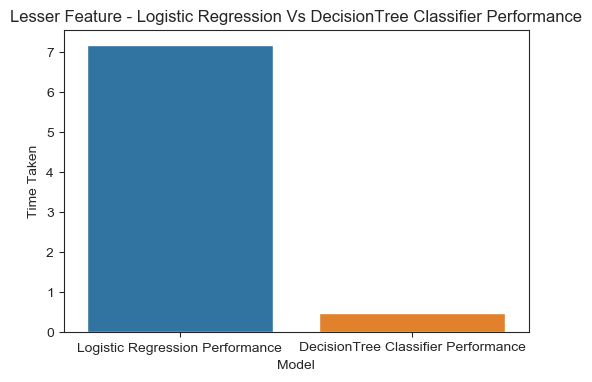

In [32]:
data = [['Logistic Regression Performance', final_l_reg_time], ['DecisionTree Classifier Performance', final_d_tree_time]] 
title = 'Lesser Feature - Logistic Regression Vs DecisionTree Classifier Performance'
plot_timetaken(data,title)

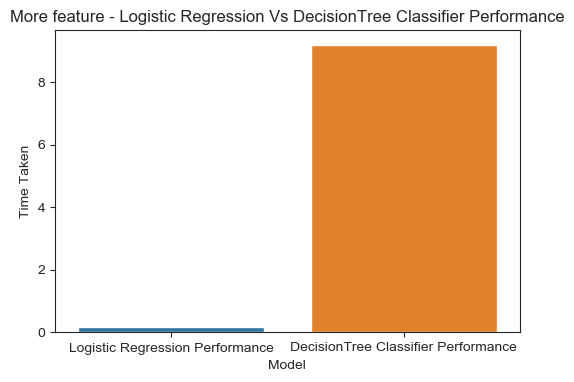

In [33]:
data = [['Logistic Regression Performance', t1_l_reg_time], ['DecisionTree Classifier Performance', t1_d_tree_time]] 
title = 'More feature - Logistic Regression Vs DecisionTree Classifier Performance'
plot_timetaken(data,title)

### 9. Compare the performance of the 2 classifiers – Logistic regression and Decision tree to predict.

,Model,Accuracy,Time Taken
0,Logistic Regression,34.80,7.18
1,DecisionTree Classifier,89.04,0.49


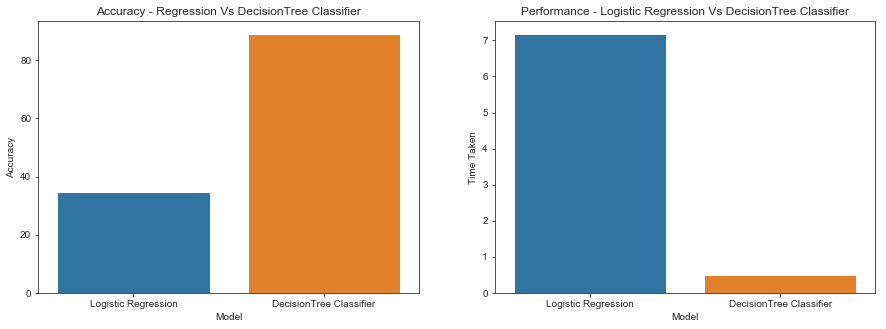

In [34]:
data = [['Logistic Regression', acc_log_regression,final_l_reg_time], ['DecisionTree Classifier', acc_decision_tree,final_d_tree_time]] 
out_accuracy = pd.DataFrame(data,columns = ['Model', 'Accuracy','Time Taken'])
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=out_accuracy['Model'],y=out_accuracy['Accuracy'],ax=axes[0]).set_title('Accuracy - Regression Vs DecisionTree Classifier')
sns.barplot(x=out_accuracy['Model'],y=out_accuracy['Time Taken'],ax=axes[1]).set_title('Performance - Logistic Regression Vs DecisionTree Classifier')
plt.subplots_adjust(hspace=1)
out_accuracy.head()


### Correlation based recommendation - Alternate approach implemented with self interest

In [35]:
def apply_transformation():
    global mv
    mv=dszudatausermoviefiltered.pivot_table(index='user id',columns='movie title',values='rating')
def get_recommendation(movie_title):
    corr_val=pd.DataFrame(mv.corrwith(mv[movie_title]),columns=['Correlation Value'])
    corr_val.dropna(inplace=True)
    corr_val=corr_val.sort_values('Correlation Value',ascending=False)
    corr_val=corr_val.join(rating['rating_count'])
    return corr_val[corr_val['rating_count']>100].sort_values('Correlation Value',ascending=False).head()
apply_transformation()
print(get_recommendation('Kolya (1996)'))

C:\Users\USER\.conda\envs\pywp\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\USER\.conda\envs\pywp\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


                                    Correlation Value  rating_count
movie title                                                        
Kolya (1996)                                 1.000000           117
Happy Gilmore (1996)                         0.739950           149
Kingpin (1996)                               0.704529           162
Alien: Resurrection (1997)                   0.701990           124
What's Eating Gilbert Grape (1993)           0.646358           115
